# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [18]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yutta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv("apis.env")
api = os.getenv("NEWS_API_KEY")

In [49]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=api)

In [50]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_head = newsapi.get_everything(q = "bitcoin", language = "en")

In [51]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_head = newsapi.get_everything(q = "ethereum", language = "en")

In [52]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)
bitcoin_df = create_df(bitcoin_head["articles"])
ethereum_df = create_df(ethereum_head["articles"])

def build_sent_score(df):
    title_sent = {
        "title_compound": [],
        "title_pos": [],
        "title_neu": [],
        "title_neg": []
    }
    text_sent = {
        "text_compound": [],
        "text_pos": [],
        "text_neu": [],
        "text_neg": []
    }

    # Get sentiment for the text and the title
    for index, row in df.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            
            if(row["text"] != None):
                text_sentiment = analyzer.polarity_scores(row["text"])
                text_sent["text_compound"].append(text_sentiment["compound"])
                text_sent["text_pos"].append(text_sentiment["pos"])
                text_sent["text_neu"].append(text_sentiment["neu"])
                text_sent["text_neg"].append(text_sentiment["neg"])
            else:
                text_sent["text_compound"].append(0)
                text_sent["text_pos"].append(0)
                text_sent["text_neu"].append(0)
                text_sent["text_neg"].append(0)
        except AttributeError:
            pass

    # Attaching sentiment columns to the News DataFrame
    title_sentiment_df = pd.DataFrame(title_sent)
    text_sentiment_df = pd.DataFrame(text_sent)
    new_df = df.join(title_sentiment_df).join(text_sentiment_df)

    return new_df
bitcoin_sent = build_sent_score(bitcoin_df)
bitcoin_sent.head()

,date,description,text,title,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
0,2021-03-15,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,India will reportedly introduce bill to make o...,-0.5574,0.000,0.714,0.286,-0.5574,0.000,0.890,0.110
1,2021-02-20,The digital cryptocurrency Bitcoin has tripled...,None,Is Bitcoin a safe bet?,0.4404,0.492,0.508,0.000,0.0000,0.000,0.000,0.000
2,2021-03-16,The hacker behind last year’s big Twitter hack...,The hacker behind last years big Twitter hack\...,Teen hacker behind the big Twitter hack senten...,-0.5267,0.000,0.694,0.306,-0.5106,0.000,0.858,0.142
3,2021-02-26,Some things are best left a mystery — at least...,Some things are best left a mystery at least a...,Coinbase says unmasking Satoshi Nakamoto might...,-0.5423,0.000,0.696,0.304,0.6369,0.113,0.887,0.000
4,2021-02-21,With the value of bitcoin in the market toppin...,None,How bitcoin is like a teenager,0.3612,0.385,0.615,0.000,0.0000,0.000,0.000,0.000


In [53]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sent = build_sent_score(ethereum_df)
ethereum_sent.head()

,date,description,text,title,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
0,2021-03-15,"Most NFTs are bought and sold with Ethereum, a...",Famed auction house Christies just sold its fi...,The climate controversy swirling around NFTs,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
1,2021-03-15,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,India will reportedly introduce bill to make o...,-0.5574,0.000,0.714,0.286,-0.5574,0.000,0.890,0.110
2,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,Worried that the GeForce RTX 3060 will be sold...,NVIDIA limits RTX 3060 crypto speeds as it int...,0.0000,0.000,1.000,0.000,-0.3400,0.063,0.818,0.119
3,2021-03-16,Here's everything you need to know about non-f...,Here's everything you need to know about non-f...,"A beginner's guide to NFTs, the crypto potenti...",0.2263,0.192,0.808,0.000,-0.1531,0.000,0.938,0.062
4,2021-03-18,OpenSea has been one of a handful of NFT marke...,OpenSea has been one of a handful of NFT marke...,NFT marketplace OpenSea raises $23 million fro...,0.0000,0.000,1.000,0.000,0.4767,0.084,0.916,0.000


In [54]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_sent.describe()

,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.002040,0.102400,0.83060,0.067000,0.104945,0.042450,0.790250,0.017350
std,0.352902,0.167874,0.16837,0.120875,0.356547,0.066186,0.347416,0.043084
min,-0.557400,0.000000,0.50800,0.000000,-0.557400,0.000000,0.000000,0.000000
25%,-0.110100,0.000000,0.69550,0.000000,0.000000,0.000000,0.850750,0.000000
50%,0.000000,0.000000,0.78750,0.000000,0.000000,0.000000,0.917500,0.000000
75%,0.323650,0.233000,1.00000,0.050000,0.365100,0.071750,1.000000,0.000000
max,0.585900,0.492000,1.00000,0.306000,0.831600,0.246000,1.000000,0.142000


In [55]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_sent.describe()

,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.050235,0.05140,0.875650,0.072950,0.186860,0.067900,0.903750,0.028350
std,0.307802,0.11736,0.158179,0.128878,0.370757,0.048923,0.062447,0.048258
min,-0.709600,0.00000,0.571000,0.000000,-0.557400,0.000000,0.789000,0.000000
25%,-0.128000,0.00000,0.720750,0.000000,0.000000,0.022500,0.861750,0.000000
50%,0.000000,0.00000,1.000000,0.000000,0.296000,0.073500,0.912500,0.000000
75%,0.000000,0.00000,1.000000,0.130000,0.475725,0.096250,0.938250,0.051500
max,0.718400,0.42900,1.000000,0.424000,0.709600,0.144000,1.000000,0.145000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin, also, has the highest compound score.

Q. Which coin had the highest negative score?

A: Ethereum has the highest negative score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [63]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [64]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addons = {"reuters", "ha", "stafffile", "photo", "poster", "pr", "cnw", "one", "according"}

In [65]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    # Remove the stop words
    
    
    return tokens

In [66]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
def build_tokens(df):
    tokens = {
        "tokens": []
    }
    
    # Get sentiment for the text 
    for index, row in df.iterrows():
        try:            
            if(row["text"] != None):
                tokens["tokens"].append(tokenizer(row["text"]))
            else:
                tokens["tokens"].append("")
        except AttributeError:
            pass

    # Attaching sentiment columns to the News DataFrame
    tokens_df = pd.DataFrame(tokens)
    new_df = df.join(tokens_df)

    return new_df
bitcoin_token_df = build_tokens(bitcoin_sent)
bitcoin_token_df.head()

,date,description,text,title,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg,tokens
0,2021-03-15,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,India will reportedly introduce bill to make o...,-0.5574,0.000,0.714,0.286,-0.5574,0.000,0.890,0.110,"[strictest, crackdown, worldwidephoto, michele..."
1,2021-02-20,The digital cryptocurrency Bitcoin has tripled...,None,Is Bitcoin a safe bet?,0.4404,0.492,0.508,0.000,0.0000,0.000,0.000,0.000,
2,2021-03-16,The hacker behind last year’s big Twitter hack...,The hacker behind last years big Twitter hack\...,Teen hacker behind the big Twitter hack senten...,-0.5267,0.000,0.694,0.306,-0.5106,0.000,0.858,0.142,"[hacker, behind, last, year, big, twitter, hac..."
3,2021-02-26,Some things are best left a mystery — at least...,Some things are best left a mystery at least a...,Coinbase says unmasking Satoshi Nakamoto might...,-0.5423,0.000,0.696,0.304,0.6369,0.113,0.887,0.000,"[thing, best, left, mystery, least, far, coinb..."
4,2021-02-21,With the value of bitcoin in the market toppin...,None,How bitcoin is like a teenager,0.3612,0.385,0.615,0.000,0.0000,0.000,0.000,0.000,


In [67]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_token_df = build_tokens(ethereum_sent)
ethereum_token_df.head()

,date,description,text,title,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg,tokens
0,2021-03-15,"Most NFTs are bought and sold with Ethereum, a...",Famed auction house Christies just sold its fi...,The climate controversy swirling around NFTs,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,"[famed, auction, house, christies, sold, first..."
1,2021-03-15,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,India will reportedly introduce bill to make o...,-0.5574,0.000,0.714,0.286,-0.5574,0.000,0.890,0.110,"[strictest, crackdown, worldwidephoto, michele..."
2,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,Worried that the GeForce RTX 3060 will be sold...,NVIDIA limits RTX 3060 crypto speeds as it int...,0.0000,0.000,1.000,0.000,-0.3400,0.063,0.818,0.119,"[worried, geforce, rtx, sold, cryptocurrency, ..."
3,2021-03-16,Here's everything you need to know about non-f...,Here's everything you need to know about non-f...,"A beginner's guide to NFTs, the crypto potenti...",0.2263,0.192,0.808,0.000,-0.1531,0.000,0.938,0.062,"[heres, everything, need, know, nonfungible, t..."
4,2021-03-18,OpenSea has been one of a handful of NFT marke...,OpenSea has been one of a handful of NFT marke...,NFT marketplace OpenSea raises $23 million fro...,0.0000,0.000,1.000,0.000,0.4767,0.084,0.916,0.000,"[opensea, handful, nft, marketplace, explode, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [68]:
from collections import Counter
from nltk import ngrams

In [69]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
def bigram_counter(doc): 
    processed = tokenizer(doc)
    bigrams = ngrams(processed, n=2)
    top_20 = dict(Counter(bigrams).most_common(20))
    return pd.DataFrame(list(top_20.items()), columns=['bigram', 'count'])
bitcoin_str = str(list(bitcoin_token_df["tokens"]))
bigram_counter(bitcoin_str)

,bigram,count
0,"(virtual, currency)",4
1,"(illustration, taken)",4
2,"(char, representation)",3
3,"(representation, virtual)",3
4,"(currency, bitcoin)",3
5,"(taken, january)",3
6,"(january, reutersdado)",3
7,"(last, year)",2
8,"(cryptocurrency, exchange)",2
9,"(investment, giveaway)",2


In [70]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_str = str(list(ethereum_token_df["tokens"]))
bigram_counter(ethereum_str)

,bigram,count
0,"(nonfungible, token)",4
1,"(char, nfts)",3
2,"(record, high)",3
3,"(cryptocurrency, miner)",2
4,"(latest, cryptocurrency)",2
5,"(cryptocurrency, platform)",2
6,"(char, new)",2
7,"(new, york)",2
8,"(ethereum, second)",2
9,"(second, largest)",2


In [71]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    return Counter(tokens).most_common(N)

In [72]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_processed = tokenizer(bitcoin_str)
print(dict(token_count(bitcoin_processed, 10)))

{'char': 17, 'bitcoin': 9, 'cryptocurrency': 4, 'virtual': 4, 'currency': 4, 'illustration': 4, 'taken': 4, 'new': 3, 'trading': 3, 'representation': 3}


In [73]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_processed = tokenizer(ethereum_str)
print(dict(token_count(ethereum_processed, 10)))

{'char': 19, 'cryptocurrency': 11, 'new': 7, 'week': 6, 'ethereum': 6, 'digital': 5, 'token': 5, 'nonfungible': 4, 'nfts': 4, 'company': 4}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

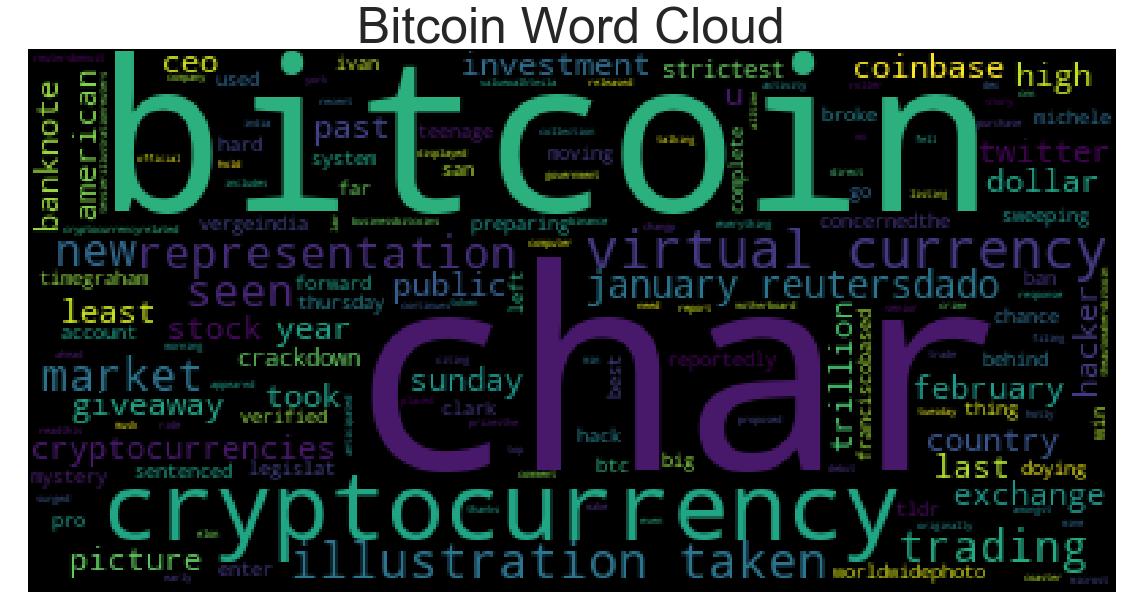

In [75]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bitcoin_wc_str = ' '.join(bitcoin_processed)
bitcoin_wc = WordCloud().generate(bitcoin_wc_str)
plt.imshow(bitcoin_wc)
plt.axis("off")
plt.title("Bitcoin Word Cloud", fontsize = 50)
plt.show()

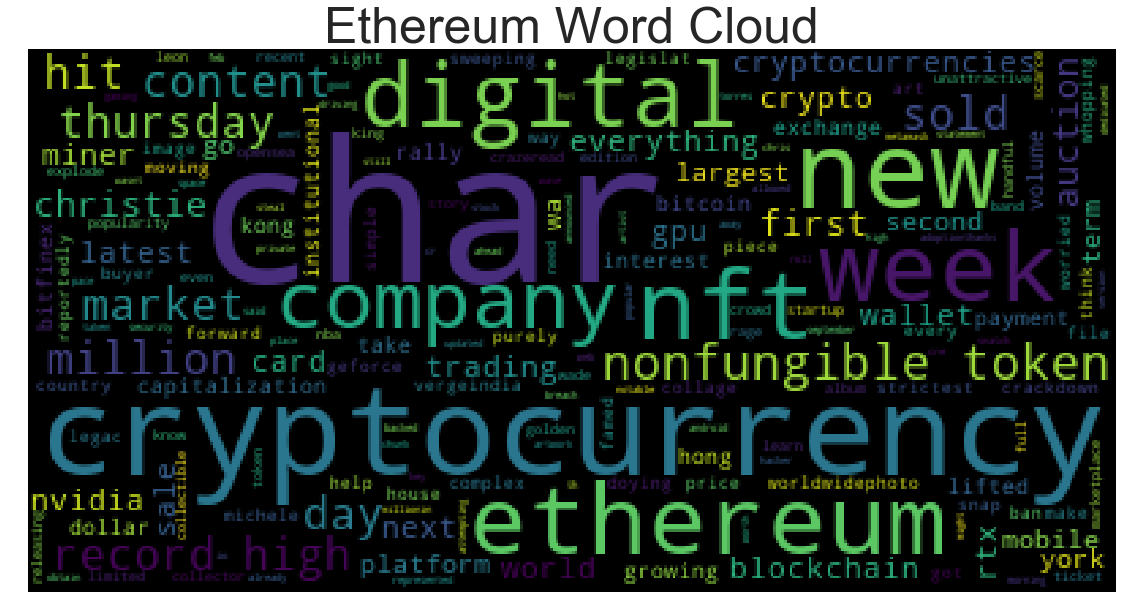

In [76]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ethereum_wc_str = ' '.join(ethereum_processed)
ethereum_wc = WordCloud().generate(ethereum_wc_str)
plt.imshow(ethereum_wc)
plt.axis("off")
plt.title("Ethereum Word Cloud", fontsize = 50)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [78]:
import spacy
from spacy import displacy

In [79]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [80]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [81]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_doc = ""
for i in range(0, len(bitcoin_df)):
    bitcoin_doc += str(bitcoin_df.text[i])

In [82]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_ner = nlp(bitcoin_doc)

# Add a title to the document
# YOUR CODE HERE!
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [83]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_ner, style = 'ent')

In [84]:
# List all Entities
# YOUR CODE HERE!
bitcoin_entities = [ent.text for ent in bitcoin_ner.ents]
bitcoin_entities

['One',
 'Photo',
 'Michele Doying',
 'India',
 'Reuters',
 'last years',
 'Twitter',
 'Graham Ivan Clark',
 'Twitters',
 'Coinbase',
 'San Francisco',
 'last year',
 'Thursday',
 'over $12,000',
 'CNN',
 'above $58,000',
 'Sunday',
 'just above $46,000',
 'Tuesday',
 'India',
 'Reuters',
 'Coinbase',
 'American',
 '19, 2021',
 'Elon Musk',
 'Binance',
 'Changp',
 'Reuters',
 'Dec. 8, 2017',
 'Benoit Tessier/Illustration',
 'Reuters',
 'Reuters',
 'Bitcoin',
 'January 21, 2021',
 'Reuters',
 'Reuters',
 'Feb 21',
 'Reuters',
 'Sunday',
 'two-month',
 '$1 trillion',
 'Friday',
 'Reuters',
 'Pristina',
 'Kosovo',
 'June 12, 2018',
 'HONG KONG',
 'Reuters Breakingviews',
 'Feb. 19, 2021',
 'Evolve',
 'week of February',
 'North American',
 '4',
 'Bitcoin',
 'past $56,000',
 'Friday',
 '$1 trillion',
 'Reuters',
 'Bitcoin',
 'U.S.',
 'January 8, 2021',
 'Dado Ru',
 'Reuters',
 'Bitcoin',
 'U.S.',
 'January 27, 2020']

---

### Ethereum NER

In [85]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_doc = ""
for i in range(0, len(ethereum_df)):
    ethereum_doc += str(ethereum_df.text[i])

In [86]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_ner = nlp(ethereum_doc)

# Add a title to the document
# YOUR CODE HERE!
ethereum_ner.user_data["title"] = "Ethereum NER"

In [87]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_ner, style = 'ent')

In [88]:
# List all Entities
# YOUR CODE HERE!
ethereum_entities = [ent.text for ent in ethereum_ner.ents]
ethereum_entities

['Christies',
 'first',
 '$69 million',
 '5,000',
 'Photo',
 'Michele Doying',
 'India',
 'Reuters',
 'GeForce',
 '3060',
 'GPU',
 'here.)OpenSea',
 'NFT',
 'recent weeks',
 'these days',
 'Kings',
 'NBA',
 'millions',
 'Ethereum',
 'first',
 "Christie's",
 'NFT',
 'a few days',
 'Chris Torres',
 'one',
 'Ethereum',
 'September 2020',
 'about $5.7 million',
 '3060',
 'GPU',
 'next week',
 'Nvidia',
 'this morning',
 'chars]NEW YORK',
 'Reuters',
 'second',
 'Thursday',
 'chars]NEW YORK',
 'Feb 18',
 'Reuters',
 'second',
 'Thursday',
 '7.34%',
 'the week ending 21st February',
 '11.65%',
 'the previous week',
 'Ethereum ended',
 'the week',
 '1,935.57',
 'the week',
 'Coinbase',
 'San Francisco',
 'last year',
 'Thursday',
 'Bitfinex',
 'Bitfinex',
 'millions of dollars',
 'Reuters',
 'SINGAPORE',
 'Reuters',
 'Asian',
 'Saturday',
 'two-month',
 '$1 trillion',
 'a day earlier',
 'World FX',
 'Kevin Buckland',
 'Reuters',
 'Meitu',
 'Hong Kong',
 'China',
 'March 24, 2017',
 'Bobby Yip

---